# Parse and MNIST-IZE Kannada Digits from handwritten grid scans:

This notebook goes through the process of generating a handwritten test dataset for Kannada digits. The first step is to construct a grid of handwritten digits using a quad ruled notepad as shown below. Afterwards, the images are generated by:

*   Slicing/extracting individual digit cells
*   MNIST-izing digit cells (eg. resizing digit images to 28x28, denoising by thresholding, and centering using center of mass)

In [0]:
# Imports
import cv2
from matplotlib import pyplot as plt
from scipy import ndimage
import numpy as np
from PIL import Image
from tqdm import tqdm_notebook
import operator
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import os
project_dir=('/gdrive/My Drive/Colab Notebooks/Kannada_MNIST')
scan_dir=os.path.join(project_dir,'data/input_scans/scans_Main')
os.chdir(project_dir)
scanned_files=os.listdir(scan_dir)
scanned_files=sorted(sorted(scanned_files),key=len)
scanned_files[0:5]

['KM--C60853790_Page_01.png',
 'KM--C60853790_Page_02.png',
 'KM--C60853790_Page_03.png',
 'KM--C60853790_Page_04.png',
 'KM--C60853790_Page_05.png']

Text(0.5, 0, 'Scanned image index')

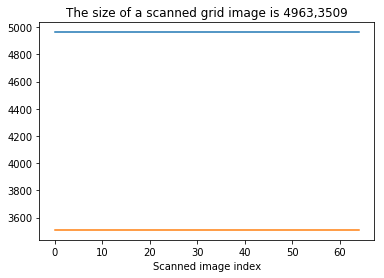

In [4]:
n_scans=len(scanned_files)
grid_sizes=np.zeros((n_scans,2),dtype=int)
for i,file_id in enumerate(scanned_files):
  im_grid=Image.open(os.path.join(scan_dir,file_id)).convert('L')
  grid_sizes[i,:]=im_grid.size

plt.plot(grid_sizes[:,0])
plt.plot(grid_sizes[:,1])
plt.title(f'The size of a scanned grid image is {grid_sizes[0,0]},{grid_sizes[0,1]}')
plt.xlabel('Scanned image index')

# Let's test one out!

Using TensorFlow backend.
W0720 20:10:30.347701 140387983988608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 20:10:30.366330 140387983988608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 20:10:30.396454 140387983988608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0720 20:10:30.399421 140387983988608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 20:10:30.401709 140387


The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.953125  0.9609375 0.8359375]


<Figure size 1296x576 with 0 Axes>

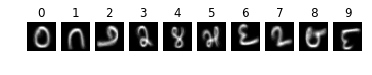

In [5]:
warnings.filterwarnings('ignore')
from keras.models import load_model
cnn_model = load_model('./models/mnist_cnn.h5')
from kannada_mnist_parser import parse_process_check
i=0
file_path_i=os.path.join(scan_dir,scanned_files[i])
fig_name_i=os.path.join(project_dir,'figures/sanity_check_plots/Main/scan_'+str(i)+'.png')
X_scan_i,y_scan_i,pred_vec_i = parse_process_check(file_path_i,fig_name_i,cnn_model)
print(pred_vec_i)


The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.953125  0.9609375 0.8359375]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 1.        0.9765625]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[1.       0.765625 0.9375  ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[1. 1. 1.]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9140625 0.9296875 0.9375   ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 1.        0.859375 ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.859375 1.       0.984375]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[1. 1. 1.]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 1.        1.       ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9765625 0.8203125 0.96875  ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.859375  0.9921875 1.       ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[1.        1.        0.9921875]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 0.9375    0.9296875]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9453125 0.6796875 0.9921875]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.984375 0.96875  0.859375]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9296875 0.9765625 0.953125 ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.875    0.859375 1.      ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 0.9921875 0.9609375]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.921875 1.       0.9375  ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 1.        1.       ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.7578125 0.9921875 0.9375   ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.921875 1.       1.      ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9453125 0.9921875 0.9921875]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9296875 0.9921875 1.       ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9453125 0.9609375 1.       ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 0.9921875 0.984375 ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.953125  0.9921875 0.984375 ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.875     0.9765625 0.9921875]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[1.       1.       0.953125]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9296875 0.9765625 0.875    ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.8984375 0.9765625 0.953125 ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 0.9921875 0.875    ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 1.        0.9921875]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9375    0.71875   0.8515625]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 0.9921875 1.       ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[1. 1. 1.]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[1.        0.9921875 0.984375 ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 0.9765625 0.84375  ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.96875  0.921875 1.      ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.953125  0.9765625 0.984375 ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.78125   0.953125  0.7890625]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.8515625 0.9921875 0.9921875]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.890625  0.953125  0.7578125]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9609375 0.984375  1.       ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[1.        0.984375  0.8671875]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.921875  0.9609375 0.9921875]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.765625 0.890625 0.875   ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9140625 0.984375  0.9921875]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.84375   0.84375   0.3828125]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 1.        0.9921875]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 1.        1.       ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.7890625 0.6875    0.7734375]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.84375  0.9375   0.953125]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.90625   0.9765625 0.765625 ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9375 1.     1.    ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[1. 1. 1.]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9296875 0.84375   0.9765625]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.71875   0.9921875 0.8515625]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9765625 1.        1.       ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.96875   0.9609375 1.       ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9609375 1.        1.       ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.8984375 0.9453125 0.6953125]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9921875 1.        0.984375 ]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[1. 1. 1.]



The shape of the tensors from the scan is:
(1280, 28, 28, 1) (1280,)
Sanity-check-0
[128 128 128 128 128 128 128 128 128 128]
Sanity check-2: Accuracies for class 0, 3 and 7 are:
[0.9453125 1.        1.       ]


<Figure size 1296x576 with 0 Axes>

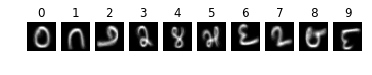

<Figure size 1296x576 with 0 Axes>

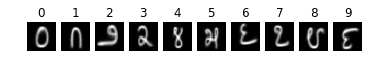

<Figure size 1296x576 with 0 Axes>

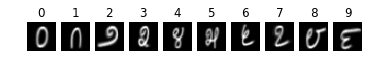

<Figure size 1296x576 with 0 Axes>

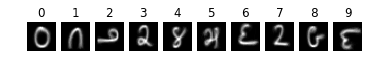

<Figure size 1296x576 with 0 Axes>

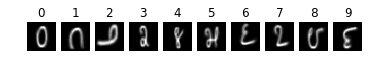

<Figure size 1296x576 with 0 Axes>

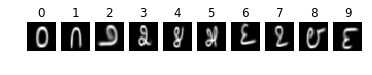

<Figure size 1296x576 with 0 Axes>

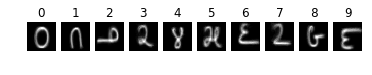

<Figure size 1296x576 with 0 Axes>

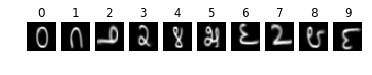

<Figure size 1296x576 with 0 Axes>

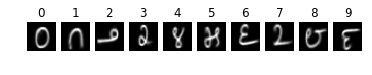

<Figure size 1296x576 with 0 Axes>

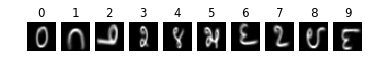

<Figure size 1296x576 with 0 Axes>

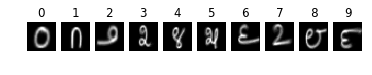

<Figure size 1296x576 with 0 Axes>

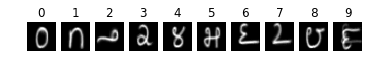

<Figure size 1296x576 with 0 Axes>

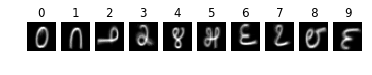

<Figure size 1296x576 with 0 Axes>

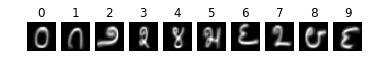

<Figure size 1296x576 with 0 Axes>

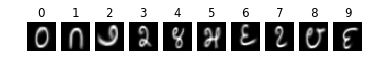

<Figure size 1296x576 with 0 Axes>

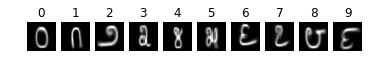

<Figure size 1296x576 with 0 Axes>

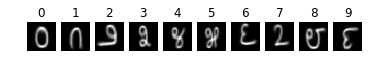

<Figure size 1296x576 with 0 Axes>

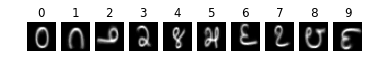

<Figure size 1296x576 with 0 Axes>

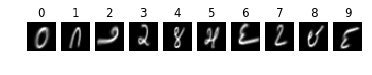

<Figure size 1296x576 with 0 Axes>

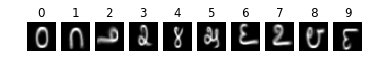

<Figure size 1296x576 with 0 Axes>

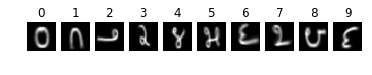

<Figure size 1296x576 with 0 Axes>

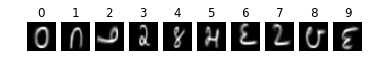

<Figure size 1296x576 with 0 Axes>

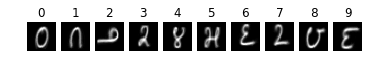

<Figure size 1296x576 with 0 Axes>

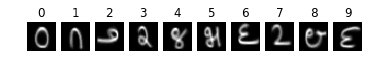

<Figure size 1296x576 with 0 Axes>

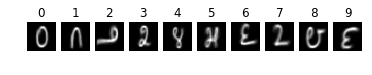

<Figure size 1296x576 with 0 Axes>

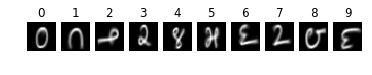

<Figure size 1296x576 with 0 Axes>

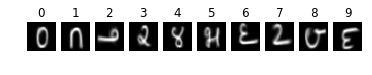

<Figure size 1296x576 with 0 Axes>

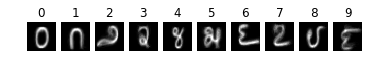

<Figure size 1296x576 with 0 Axes>

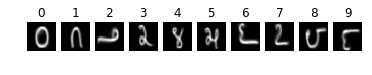

<Figure size 1296x576 with 0 Axes>

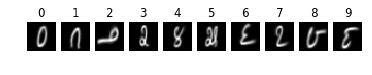

<Figure size 1296x576 with 0 Axes>

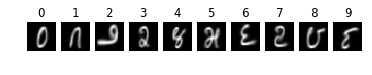

<Figure size 1296x576 with 0 Axes>

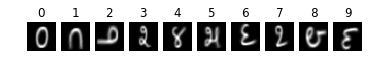

<Figure size 1296x576 with 0 Axes>

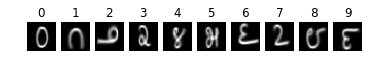

<Figure size 1296x576 with 0 Axes>

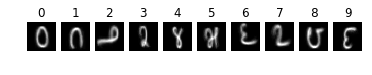

<Figure size 1296x576 with 0 Axes>

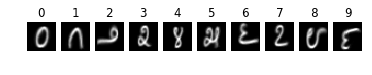

<Figure size 1296x576 with 0 Axes>

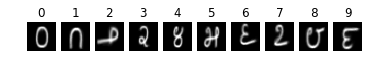

<Figure size 1296x576 with 0 Axes>

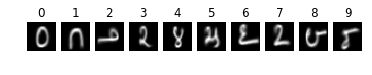

<Figure size 1296x576 with 0 Axes>

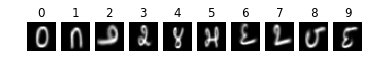

<Figure size 1296x576 with 0 Axes>

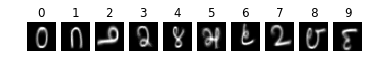

<Figure size 1296x576 with 0 Axes>

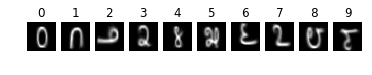

<Figure size 1296x576 with 0 Axes>

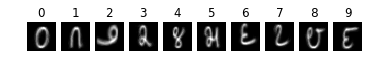

<Figure size 1296x576 with 0 Axes>

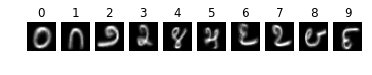

<Figure size 1296x576 with 0 Axes>

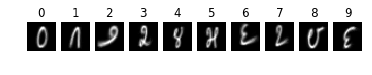

<Figure size 1296x576 with 0 Axes>

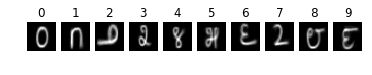

<Figure size 1296x576 with 0 Axes>

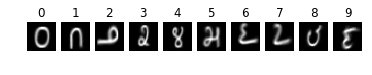

<Figure size 1296x576 with 0 Axes>

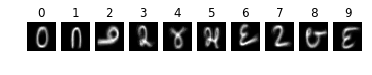

<Figure size 1296x576 with 0 Axes>

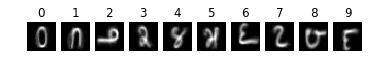

<Figure size 1296x576 with 0 Axes>

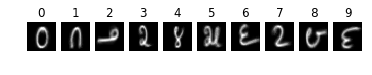

<Figure size 1296x576 with 0 Axes>

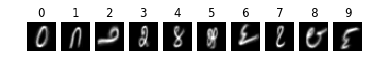

<Figure size 1296x576 with 0 Axes>

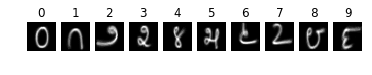

<Figure size 1296x576 with 0 Axes>

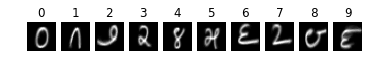

<Figure size 1296x576 with 0 Axes>

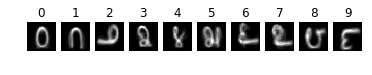

<Figure size 1296x576 with 0 Axes>

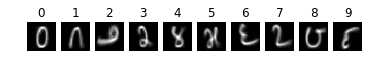

<Figure size 1296x576 with 0 Axes>

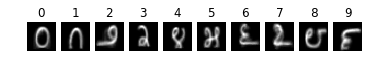

<Figure size 1296x576 with 0 Axes>

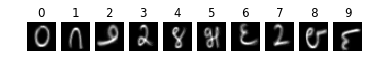

<Figure size 1296x576 with 0 Axes>

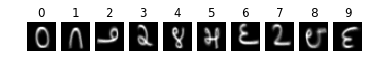

<Figure size 1296x576 with 0 Axes>

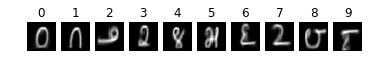

<Figure size 1296x576 with 0 Axes>

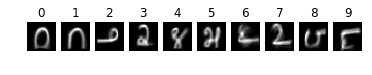

<Figure size 1296x576 with 0 Axes>

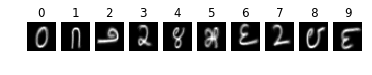

<Figure size 1296x576 with 0 Axes>

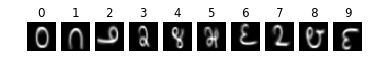

<Figure size 1296x576 with 0 Axes>

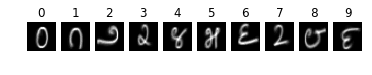

<Figure size 1296x576 with 0 Axes>

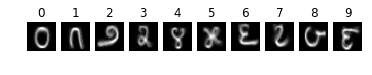

<Figure size 1296x576 with 0 Axes>

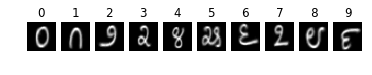

<Figure size 1296x576 with 0 Axes>

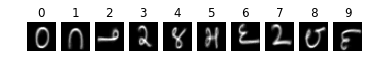

<Figure size 1296x576 with 0 Axes>

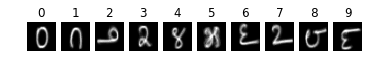

In [6]:
X_Ka_mnist=np.zeros((n_scans,1280,28,28,1))
y_Ka_mnist=np.zeros((n_scans,1280))
sanity_check_3=np.zeros((n_scans,3))

for i in range(n_scans):
  file_path_i=os.path.join(scan_dir,scanned_files[i])
  fig_name_i=os.path.join(project_dir,'figures/sanity_check_plots/Main/scan_'+str(i)+'.png')
  X_scan_i,y_scan_i,pred_vec_i = parse_process_check(file_path_i,fig_name_i,cnn_model)
  print(pred_vec_i)
  if(X_scan_i.shape==(1280, 28, 28, 1)):
    X_Ka_mnist[i]=X_scan_i
    y_Ka_mnist[i,:]=y_scan_i
    sanity_check_3[i,:]=pred_vec_i
    
    
  

# Save the tensors!

In [0]:
np.save('./data/output_tensors/X_Ka_mnist_userwise.npy',X_Ka_mnist)
np.save('./data/output_tensors/y_Ka_mnist_userwise.npy',y_Ka_mnist)

In [0]:
X_Kannada_mnist=X_Ka_mnist.reshape(n_scans*32*40,28,28,1)
y_Kannada_mnist=y_Ka_mnist.reshape(n_scans*32*40)

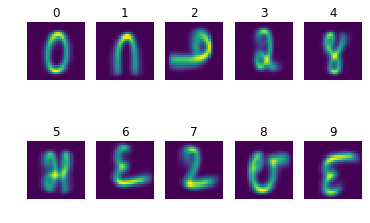

In [9]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(np.mean(X_Kannada_mnist[y_Kannada_mnist==i,:,:,0], axis=0))
    plt.axis('off')
    plt.title(i)

In [0]:
np.save('./data/output_tensors/X_Kannada_mnist.npy',X_Kannada_mnist)
np.save('./data/output_tensors/y_Kannada_mnist.npy',y_Kannada_mnist)
np.save('./data/output_tensors/sanity_check_3.npy',sanity_check_3)